# Анализ оттока клиентов "Метанпромбанк"   


Наш банк в срочном порядке ищет аналитиков уверенным владением «Python». Вашей главной задачей станет анализ оттока клиентов. Анализ покажет, какие клиенты уходят из банка, а так же поможет нам составить сегменты клиентов, которые склонны уходить из банка.
«Метанпромбанк» — деньги не пахнут!

Описание данных:
        Датасет содержит данные о клиентах банка "Метанпромбанк".Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.  
       /datasets/bank_scrooge.csv  
            Колонки:  
        - userid-идентификатор пользователя;  
        - score баллы кредитного скоринга;  
        - сity-город;  
        - gender-пол;  
        - age-возраст;  
        - equity -количество баллов собственности;  
        - balance-баланс на счете;  
        - products -количество продуктов которыми пользуется клиент;  
        - credit_card -есть ли кредитная карта;  
        - last_activity - активный клиент;  
        - EST_SALARY - оценочный доход клиента;  
        - сhurn - признак оттока.  

Цели исследования:Целью исследования является произвести анализ оттока клиентов банка, определенить закономерности и выявить "портрет" отточного клиента для дальнейшего принятия решений.


Задачи исследования:      
    1.Предобработка данных  
     1.1 Загрузка датасета и необходимых библиотек.  
     1.2 Проверка типов данных  
     1.3 Приведение названий столбцов к единому стилю      
     1.4 Анализ пропущенных значений  
     1.5 Поиск дубликатов(определить наличие полных и неполных дубликатов),принять решение на их счет.Анализ выбросов,поиск аномалий.  
2.Исследовательский анализ данных  
    2.1 Распределение клиентов по признакам, комбинация клиентов по 2-3 признакам  
    2.2 Построение визуализаций в разрезе признаков и отточных/ неотточных клиентов  
    2.3 Сравнение портрета оставшихся и отточных клиентов  
    2.4 Построение распределения непрерывных величин с помощью кодировки.  
    2.5 Корреляционный анализ  
3.Статический анализ данных  
    3.1 Формулировка гипотез  
    3.2 Выбор используемого стат.критерия,проведение тестирования.  
4.Сегментация клиентов на основании проведенного анализа  
    4.1 Выделение сегментов отточных клиентов по комбинации признаков  
    4.2 Расчет метрик (общее количество клиентов, количество отточных клиентов, процент отточных клиентов в каждом сегменте)  
    4.3 Предложения и рекомендации по снижению уровня оттока по сегментам  
5.Презентация с подведением итогов и выялением закономерностей отточных клиентов.      

    

## Предобработка данных

### Загружаем датасет и необходимые библиотеки 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as mth
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')#конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
import plotly.graph_objects as go
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy import stats
import plotly.express as px





In [2]:
bank = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
bank.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Проведем проверку типов данных

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Данные о клиентах банка представлены датасетом из 10000 строк и 12 столбцов. Имеются категориальные данные типа object(city и gender) и числовые, финансовые показатели (score,equity,balance,poducts,credit_card,last_activity),по которым мы далее будем проводить оценку.В данных в двух столбцах(age и balance) присутствуют пропуски.В age это 26 значений,в balance 2295 значений,что требует дальнейшего анализа.

### Приведем названия столбцов к единому стилю

In [5]:
bank.rename(columns={'USERID': 'user_id', 'EST_SALARY': 'est_salary'}, inplace=True) 


### Проведем анализ пропущенных значений

In [6]:
bank.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Наблюдаем большое количество пропусков в балансе и небольшое в возрасте клиентов.

In [7]:
print(f"Процент пропусков по столбцу баланс:{((bank['balance'].isna().sum()) / len(bank['balance'])*100)}")


Процент пропусков по столбцу баланс:22.95


Применим one-hot кодирование к столбцам city и gender, но при этом сохраним оригинальные столбцы,используя параметр drop_first=False в функции pd.get_dummies(). Это позволит сохранить все оригинальные столбцы.

In [8]:
dummies = pd.get_dummies(bank[['city', 'gender']], drop_first=False)
bank = pd.concat([bank, dummies], axis=1)



In [9]:
bank.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


 Для проведения дальнейшего корреляционного анализа, c целью выявление зависимости пропусков в балансе от других признаков,добавим столбец missing_balance со значениями 0 и 1, которые свидетельствуют об отсутсвии или наличии пропусков. 

In [10]:
bank['missing_balance'] = bank['balance'].isnull().astype(int)


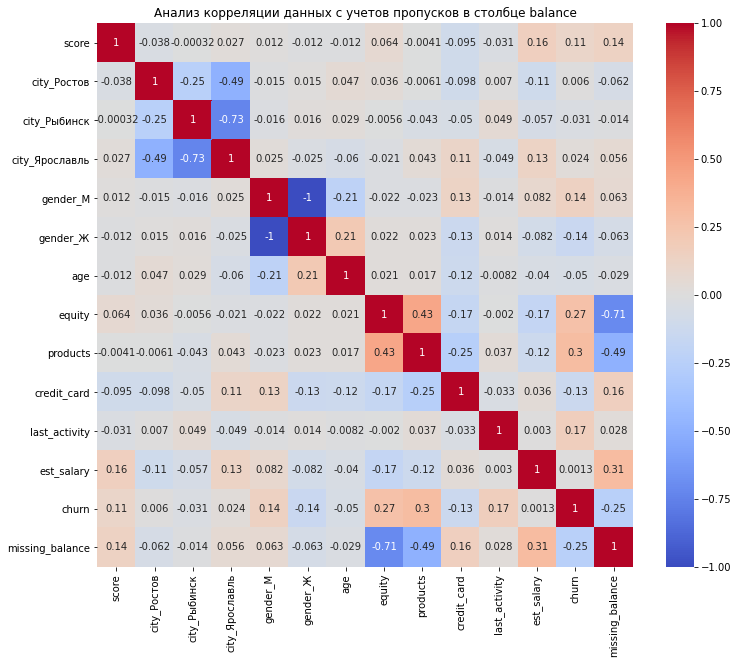

In [11]:
correlation_matrix = bank[['score','city_Ростов','city_Рыбинск','city_Ярославль','gender_М','gender_Ж','age','equity','products','credit_card','last_activity','est_salary','churn','missing_balance']].corr()
plt.figure(figsize=(12, 10))  # Увеличиваем размер графика для лучшей читаемости

# Построение тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Добавление заголовка
plt.title('Анализ корреляции данных с учетов пропусков в столбце balance')
plt.show()

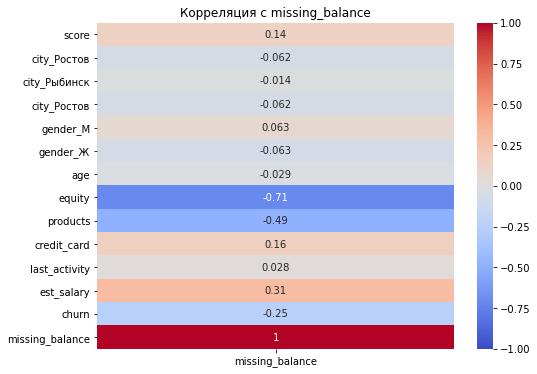

In [12]:
# Вычисляем корреляционную матрицу
correlation_matrix = bank[['score', 'city_Ростов','city_Рыбинск','city_Ростов', 'gender_М','gender_Ж', 'age', 'equity', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'missing_balance']].corr()

# Извлекаем только строку и столбец, соответствующие missing_balance
missing_balance_correlation = correlation_matrix[['missing_balance']]

# Построение тепловой карты для корреляций со столбцом missing_balance
plt.figure(figsize=(8, 6))  # Увеличиваем размер графика для лучшей читаемости
sns.heatmap(missing_balance_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Добавление заголовка
plt.title('Корреляция с missing_balance')
plt.show()


  По проведенной выше корреляции может отметить что наблюдается сильная отрицательная корреляция с equity(количеством баллов собственности) и с products(количеством продуктов которыми пользуется клиент).Также наблюдается небольшая положительная корреляция с est_salary(оценочным доходом клиента) и score(баллами кредитного скоринга).Считаю что пропуски в балансе удалять и заменять некорректно,т.к. объем их довольно большой(22,95%),а также есть взаимосвязь с количеством баллов собственности и количеством продуктов и замена или удаление сильно повлияет на полноту данных в датасете. 

In [13]:
bank['balance'].describe()

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

 Средний баланс составляет примерно 827794,3.Стандартное отклонение (std): Стандартное отклонение равно 1980614, что указывает на высокую изменчивость данных. Это означает, что значения баланса сильно варьируются.Минимальный баланс равен 0, что может указывать на наличие клиентов без средств на счетах.25% клиентов имеют баланс менее 295554,2; 50% (медиана) клиентов имеют баланс менее 524272,2; 75% клиентов имеют баланс менее 980705,8.Эти данные показывают, что большинство клиентов имеют балансы ниже среднего значения, что может свидетельствовать о том, что несколько клиентов с очень высокими балансами (возможно, миллионы или десятки миллионов) поднимают среднее значение.Максимальный баланс составляет 119113600, что является очень высоким значением и подтверждает наличие клиентов с очень большими средствами.Убирать из рассмотрения клиентов с большими балансами не считаю целесообразным,т.к.это исказит данные и данные цифры могут отражать действительность.Однако для рассмотрения графика распределения баланса,ограничу баланс 5 млн.руб.

 

In [14]:
bank['balance'] = bank['balance'].clip(upper=5000000)


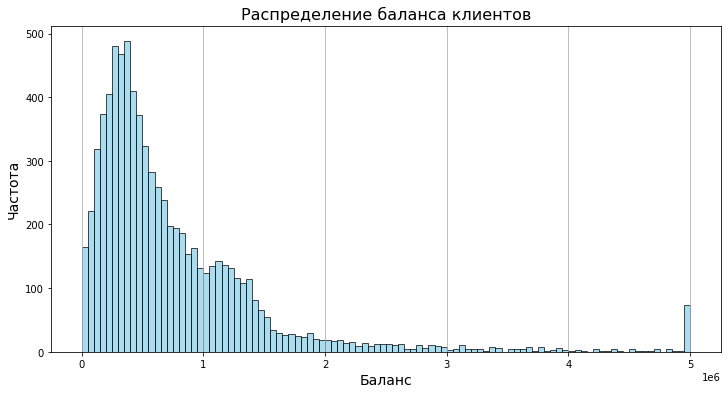

In [15]:
# Настройка графика
plt.figure(figsize=(12, 6))

# Построение гистограммы
bank['balance'].hist(bins=100, color='skyblue', edgecolor='black', alpha=0.7, grid=True)

# Добавление заголовка и меток осей
plt.title('Распределение баланса клиентов', fontsize=16)
plt.xlabel('Баланс', fontsize=14)
plt.ylabel('Частота', fontsize=14)
# Добавление сетки для лучшей читаемости
plt.grid(axis='y', alpha=0.75)
# Показать график
plt.show()


График подтвержает описательную статистику и получился с положительной(правой)ассиметрией,пиковое значение(мода)расположено примерно на 500 тыс.руб.

In [16]:
print(bank['age'].isna().sum())


26


Посчитаем доля пропущенным значений по возрасту.

In [17]:
print(f"Процент пропусков по столбцу возраст:{((bank['age'].isna().sum()) / len(bank['age'])*100):.2f}")


Процент пропусков по столбцу возраст:0.26


Ввиду такого малого количества пропусков по данному столбцу,и незначительной их доли от общего количества данных считаю целесообразным заменить пропуски медианным значением.

In [18]:
bank['age'].median()

40.0

In [19]:
bank['age']=bank['age'].fillna(bank['age'].median())

### Поиск дубликатов(определить наличие полных и неполных дубликатов),принять решение на их счет.Анализ выбросов,поиск аномалий.

In [20]:
bank.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,missing_balance
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1,0


Проверим данные на наличие дубликатов.

In [21]:
bank.duplicated().sum()

0

Проведем проверка на идентификатору user_id.

In [22]:
bank['user_id'].duplicated().sum()

73

Имеет 73 дубликата по столбцу user_id,однако возможно это клиенты банка из разных городов? Проверим наличие дубликатов по идентификатору  и городу. 

In [23]:
duplicate_count = bank.duplicated(subset=['user_id', 'city'], keep=False).sum()
print(duplicate_count)


0


Делаем вывод, что это пользователи из разных городов и оставляем их в базе.

In [24]:
bank['score'].describe()

count    10000.000000
mean       848.699400
std         65.448519
min        642.000000
25%        802.000000
50%        853.000000
75%        900.000000
max       1000.000000
Name: score, dtype: float64

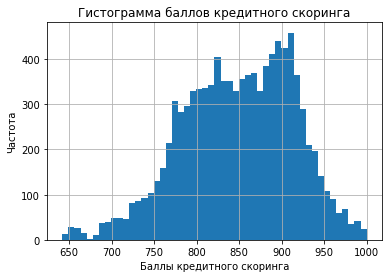

In [25]:
bank['score'].hist(bins=50)
# Добавление подписей для осей
plt.xlabel('Баллы кредитного скоринга')  # Подпись для оси X
plt.ylabel('Частота')                     # Подпись для оси Y
plt.title('Гистограмма баллов кредитного скоринга')  # Заголовок графика (по желанию)

# Отображение графика
plt.show();

Баллы кредитного скоринга рассположены в диапазоне от 650 до 1000,является нормальным,выбросов и аномалий не обнаружено.

In [26]:
bank['city'].describe()

count         10000
unique            3
top       Ярославль
freq           5888
Name: city, dtype: object

Данные представлены в разрезе 3 городов,что не противоречит условию.

In [27]:
bank['gender'].describe()

count     10000
unique        2
top           М
freq       5005
Name: gender, dtype: object

Пол представлен 2 значениями,что является верным.

In [28]:
bank['age'].describe()

count    10000.000000
mean        42.727300
std         12.164922
min         18.000000
25%         33.000000
50%         40.000000
75%         51.000000
max         86.000000
Name: age, dtype: float64

Возраст имеет разброс от 18 до 86,что является допустимым значением.

In [29]:
bank['equity'].describe()

count    10000.000000
mean         2.627600
std          1.980836
min          0.000000
25%          0.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: equity, dtype: float64

Score количество баллов собственности представлено диапазоном от 0 до 9.

In [30]:
bank['products'].describe()

count    10000.000000
mean         1.870100
std          0.792647
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: products, dtype: float64

По условию задачи  известно что продуктов всего 5 и пользователей без продуктов быть не должно.

In [31]:
bank[bank['products'] == 0]


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,missing_balance
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,0,1,0,1,0,1


Очистим данные от пользователя без продуктов,т.к. таких пользователей не должно быть.

In [32]:
bank=bank[bank['products']> 0]


In [33]:
bank['credit_card'].describe()

count    9999.000000
mean        0.680468
std         0.466319
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: credit_card, dtype: float64

credit_card представлено двумя значениеями 1 и 0,наличием и отсутствием.

In [34]:
bank['last_activity'].describe()

count    9999.000000
mean        0.523552
std         0.499470
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: last_activity, dtype: float64

last_activity представлено двумя значениеями 1 и 0,наличием и отсутствием.

In [35]:
bank['est_salary'].describe()

count    9.999000e+03
mean     1.478792e+05
std      1.393901e+05
min      2.546300e+03
25%      7.525212e+04
50%      1.196615e+05
75%      1.745011e+05
max      1.395064e+06
Name: est_salary, dtype: float64

In [36]:
bank['est_salary'] = bank['est_salary'].clip(upper=1000000)


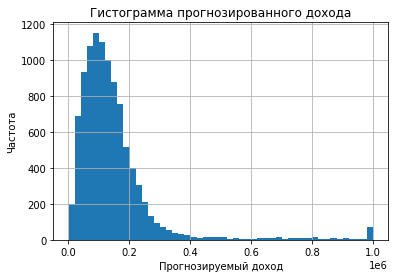

In [37]:
bank['est_salary'].hist(bins=50)
# Добавление подписей для осей
plt.xlabel('Прогнозируемый доход')  # Подпись для оси X
plt.ylabel('Частота')                     # Подпись для оси Y
plt.title('Гистограмма прогнозированного дохода')  
# Отображение графика
plt.show();

In [38]:
min_salary=len(bank.loc[bank['est_salary'] < 22440])
print(min_salary)


198


In [39]:
share_minSalary= ((min_salary) / len(bank))
print(f"Процент ожидаемого дохода клиентов ниже уровня МРОТ: {share_minSalary:.2%}")


Процент ожидаемого дохода клиентов ниже уровня МРОТ: 1.98%


Поскольку таких значений немного(около 2%), но выглядят они довольно неправдоподобно,заменим данные значения прогнозируемого дохода на МРОТ. На 01.01.2025 он составляет 22440.

In [40]:
# Замена значений
bank.loc[bank['est_salary'] < 22440, 'est_salary'] = 22440


In [41]:
bank['churn'].describe()

count    9999.000000
mean        0.181918
std         0.385796
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

churn (показатель оттока) представлен двумя значениеями 1 и 0,отточными и лояльными клиентами.

## Исследовательский анализ данных  


### Распределение клиентов по признакам

In [42]:
#Посчитаем уровень оттока клиентов банка
churn_bank=(len(bank.query('churn==1'))/ len(bank))*100
print(f"Процент оттока клиентов банка: {churn_bank:.2f}%")


Процент оттока клиентов банка: 18.19%


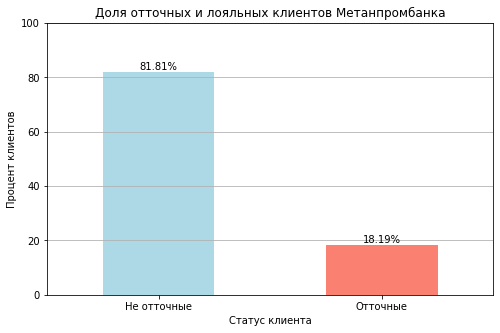

In [43]:
churn_counts = bank['churn'].value_counts(normalize=True) * 100
# Создаем график
plt.figure(figsize=(8, 5))
churn_counts.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Доля отточных и лояльных клиентов Метанпромбанка')
plt.xlabel('Статус клиента')
plt.ylabel('Процент клиентов')
plt.xticks(ticks=[0, 1], labels=['Не отточные', 'Отточные'], rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')

# Показать значения на столбцах
for index, value in enumerate(churn_counts):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')
plt.show()



Посчитаем долю мужчин и женщин в датасете:

In [44]:
male_ratio = len(bank.query('gender == "М"')) / len(bank) * 100
female_ratio = 100 - male_ratio

print(f"Доля мужчин: {male_ratio:.2f}%, доля женщин: {female_ratio:.2f}%")


Доля мужчин: 50.06%, доля женщин: 49.94%


In [45]:
male_churn = len(bank.query('gender == "М" & churn==1')) / len(bank.query('gender == "М"'))* 100
print(f"Доля оттока среди мужчин:{male_churn:.2f}%")
female_churn = len(bank.query('gender == "Ж" & churn==1')) / len(bank.query('gender == "Ж"'))* 100
print(f"Доля оттока среди женщин:{female_churn:.2f}%")

Доля оттока среди мужчин:23.64%
Доля оттока среди женщин:12.74%


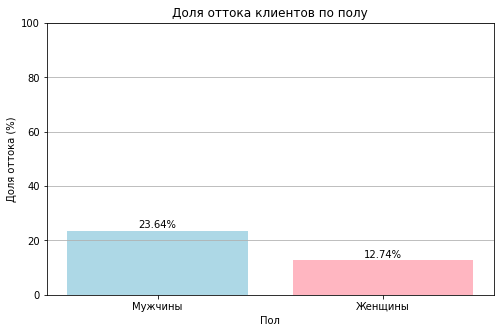

In [46]:
# Создание списков для графика
genders = ['Мужчины', 'Женщины']
churn_rates = [male_churn, female_churn]

# Построение графика
plt.figure(figsize=(8, 5))
bars = plt.bar(genders, churn_rates, color=['lightblue', 'lightpink'])
plt.title('Доля оттока клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Доля оттока (%)')
plt.ylim(0, 100)

# Показать значения на столбцах
for bar in bars:
    yval = bar.get_height()  # Получаем высоту столбца
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center')

plt.grid(axis='y')
plt.show()

In [47]:
ageYoung_churn = len(bank.query('age < 30 & churn==1')) / len(bank.query('age < 30'))* 100
print(f"Доля оттока клиентов с возрастом 30 лет и менее:{ageYoung_churn:.2f}%")
ageOther_churn = len(bank.query('40 >= age >= 30 & churn==1')) / len(bank.query('40 > age > 30'))* 100
print(f"Доля оттока клиентов с возрастом  от 30 до 40 лет:{ageOther_churn:.2f}%")
ageElder_churn = len(bank.query(' age > 40 & churn==1')) / len(bank.query('age > 40'))* 100
print(f"Доля оттока клиентов с возрастом более 40 лет:{ageElder_churn:.2f}%")


Доля оттока клиентов с возрастом 30 лет и менее:23.00%
Доля оттока клиентов с возрастом  от 30 до 40 лет:21.71%
Доля оттока клиентов с возрастом более 40 лет:16.98%


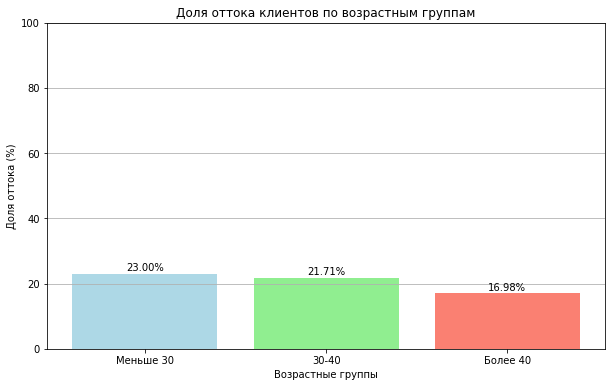

In [48]:
# Создание списка с данными для графика
age_groups = ['Меньше 30', '30-40', 'Более 40']
churn_rates = [ageYoung_churn, ageOther_churn, ageElder_churn]

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(age_groups, churn_rates, color=['lightblue', 'lightgreen', 'salmon'])
plt.title('Доля оттока клиентов по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Доля оттока (%)')
plt.ylim(0, 100)

# Показать значения на столбцах
for index, value in enumerate(churn_rates):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

plt.grid(axis='y')
plt.show()


In [49]:
scoreMin_ratio = len(bank.query('score<800 & churn==1')) / len(bank.query('score<800')) * 100
print(f"Доля оттока среди жителей c баллами кредитного скоринга меньше 800:{scoreMin_ratio:.2f}%")
scoreMax_ratio = len(bank.query('score>=800 & churn==1')) / len(bank.query('score>=800')) * 100
print(f"Доля оттока среди жителей c баллами кредитного скоринга выше 800:{scoreMax_ratio:.2f}%")


Доля оттока среди жителей c баллами кредитного скоринга меньше 800:8.69%
Доля оттока среди жителей c баллами кредитного скоринга выше 800:21.18%



<div class="alert alert-warning">
<b>Комментарий ревьюера v2.0:</b>☀️Понимаю, что будут дальше, но все уже здесь не хватает графиков - сложно воспринимать много цифр.</div>

Можем сделать промежуточный вывод,что мужчины более подвержаны оттоку.

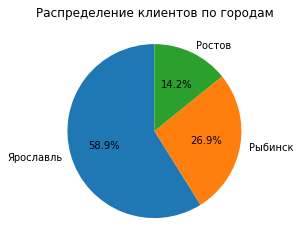

In [50]:
city_counts = bank['city'].value_counts()

# Затем строим круговую диаграмму
city_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Распределение клиентов по городам')
plt.ylabel('')  # Убираем ярлык оси Y
plt.show()

Т.к. наибольшее количество клиентов из Ярославля посчитаем процент оттока по нему.

In [51]:
yarosl_ratio = len(bank.query('city == "Ярославль" & churn==1')) / len(bank.query('city == "Ярославль"')) * 100
print(f"Доля оттока среди жителей Ярославля:{yarosl_ratio:.2f}%")
rybinsk_ratio = len(bank.query('city == "Рыбинск" & churn==1')) / len(bank.query('city == "Рыбинск"')) * 100
print(f"Доля оттока среди жителей Рыбинска:{rybinsk_ratio:.2f}%")
rostov_ratio = len(bank.query('city == "Ростов" & churn==1')) / len(bank.query('city == "Ростов"')) * 100
print(f"Доля оттока среди жителей Ростова:{rostov_ratio:.2f}%")

Доля оттока среди жителей Ярославля:18.97%
Доля оттока среди жителей Рыбинска:16.18%
Доля оттока среди жителей Ростова:18.77%


Посмотрим уровень оттока по балансу,т.к. среднее значение примерно 500тыс,условно разделим на 2 группы:больше и меньше этой суммы.

In [52]:
balLow_ratio = len(bank.query('balance <500000 & churn==1')) / len(bank.query('balance <500000')) * 100
print(f"Доля оттока среди клиентов с балансом менее 500 тыс.:{balLow_ratio:.2f}%")
balHigh_ratio = len(bank.query('balance >=500000 & churn==1')) / len(bank.query('balance >=500000')) * 100
print(f"Доля оттока среди клиентов с балансом более 500 тыс.:{balHigh_ratio:.2f}%")

Доля оттока среди клиентов с балансом менее 500 тыс.:16.67%
Доля оттока среди клиентов с балансом более 500 тыс.:29.72%


Посмотрим уровень оттока по количеству продуктов у пользователя.Условно разделем клиентов на 2 группы с 2 продуктами и менее  и с 3 и более.

In [53]:
products2_ratio = len(bank.query('products<=2 & churn==1')) / len(bank.query('products<=2')) * 100
print(f"Доля оттока среди клиентов с 2 продуктами и менее.:{products2_ratio:.2f}%")
products3_ratio = len(bank.query('products>3 & churn==1')) / len(bank.query('products>3')) * 100
print(f"Доля оттока среди клиентов с 3 продуктами и более.:{products3_ratio:.2f}%")


Доля оттока среди клиентов с 2 продуктами и менее.:14.34%
Доля оттока среди клиентов с 3 продуктами и более.:62.47%


Посмотрим уровень оттока по наличию кредитной карты

In [54]:
len(bank.query('credit_card==0'))

3195

In [55]:
cred1_ratio = len(bank.query('credit_card==1 & churn==1')) / len(bank.query('credit_card==1')) * 100
print(f"Доля оттока среди клиентов имеющих кредитную карту.:{cred1_ratio:.2f}%")
cred2_ratio = len(bank.query('credit_card==0 & churn==1')) / len(bank.query('credit_card==0')) * 100
print(f"Доля оттока среди клиентов не имеющих кредитную карту.:{cred2_ratio:.2f}%")


Доля оттока среди клиентов имеющих кредитную карту.:14.74%
Доля оттока среди клиентов не имеющих кредитную карту.:25.54%


Рассмотрим оценочный доход клиентов.

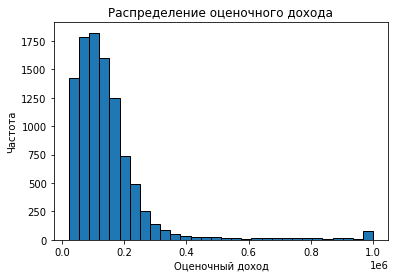

In [56]:
bank['est_salary'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Распределение оценочного дохода')
plt.xlabel('Оценочный доход')
plt.ylabel('Частота')
plt.show()


In [57]:
bank['est_salary'].median()

119661.51

Разделим клиентов на условные группы с оценочных доходом до 100 тыс и более 100 тыс.

In [58]:
salaryLow_ratio = len(bank.query('est_salary<=100000 & churn==1')) / len(bank.query('est_salary<=100000')) * 100
print(f"Доля оттока среди клиентов c оценочным доходом до 100 тыс.:{salaryLow_ratio:.2f}%")
salaryHigh_ratio = len(bank.query('est_salary>100000 & churn==1')) / len(bank.query('est_salary>100000')) * 100
print(f"Доля оттока среди клиентов c оценочным доходом более 100 тыс.:{salaryHigh_ratio:.2f}%")


Доля оттока среди клиентов c оценочным доходом до 100 тыс.:15.89%
Доля оттока среди клиентов c оценочным доходом более 100 тыс.:19.68%


### Построение визуализаций в разрезе признаков и оттока по категориям(отточные и неотточные клиенты)

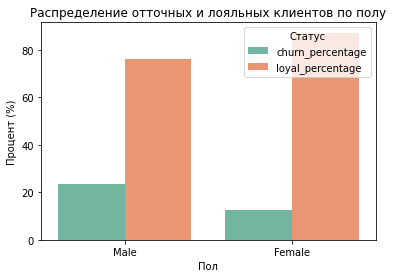

In [59]:
#bank['gender'] = bank['gender_M'].replace(1, 'Male').replace(0, 'Female')

# Подсчет общего количества мужчин и женщин
total_counts = bank['gender'].value_counts().reset_index()
total_counts.columns = ['gender', 'total']

# Подсчет отточных по полу
churn_counts = bank[bank['churn'] == 1].groupby('gender').size().reset_index(name='churned')

# Подсчет лояльных по полу
loyal_counts = bank[bank['churn'] == 0].groupby('gender').size().reset_index(name='loyal')

# Объединение данных для расчета процентов
combined = total_counts.merge(churn_counts, on='gender', how='left').fillna(0)
combined = combined.merge(loyal_counts, on='gender', how='left').fillna(0)

# Расчет процентов
combined['churn_percentage'] = (combined['churned'] / combined['total']) * 100
combined['loyal_percentage'] = (combined['loyal'] / combined['total']) * 100

# Преобразование данных для построения графика
melted = combined.melt(id_vars='gender', value_vars=['churn_percentage', 'loyal_percentage'],
                        var_name='status', value_name='percentage')

# Построение столбчатой диаграммы
# Построение столбчатой диаграммы
sns.barplot(x='gender', y='percentage', hue='status', data=melted, palette='Set2')
plt.title('Распределение отточных и лояльных клиентов по полу')
plt.xlabel('Пол')
plt.ylabel('Процент (%)')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])

# Указание меток на русском языке
plt.legend(title='Статус')
plt.show()



<div class="alert alert-danger">
<b>Комментарий ревьюера v2.0:</b>Здесь не совсем ясна легенда.</div>

Как видно из распределения, процент отточных мужчин выше,чем женщин.

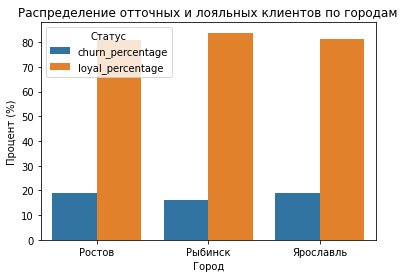

In [60]:
# Добавление общего статуса city
bank['city'] = bank[['city_Ростов', 'city_Рыбинск', 'city_Ярославль']].idxmax(axis=1).replace({
    'city_Ростов': 'Ростов',
    'city_Рыбинск': 'Рыбинск',
    'city_Ярославль': 'Ярославль'
})

# Подсчет общего количества клиентов по городам
total_counts = bank['city'].value_counts().reset_index()
total_counts.columns = ['city', 'total']

# Подсчет отточных по городам
churn_counts = bank[bank['churn'] == 1].groupby('city').size().reset_index(name='churned')

# Подсчет лояльных по городам
loyal_counts = bank[bank['churn'] == 0].groupby('city').size().reset_index(name='loyal')

# Объединение данных для расчета процентов
combined = total_counts.merge(churn_counts, on='city', how='left').fillna(0)
combined = combined.merge(loyal_counts, on='city', how='left').fillna(0)

# Расчет процентов
combined['churn_percentage'] = (combined['churned'] / combined['total']) * 100
combined['loyal_percentage'] = (combined['loyal'] / combined['total']) * 100

# Преобразование данных для построения графика
melted = combined.melt(id_vars='city', value_vars=['churn_percentage', 'loyal_percentage'],
                        var_name='status', value_name='percentage')

# Построение столбчатой диаграммы с заданной палитрой цветов
sns.barplot(x='city', y='percentage', hue='status', data=melted)
plt.title('Распределение отточных и лояльных клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Процент (%)')
plt.xticks(ticks=[0, 1, 2], labels=['Ростов', 'Рыбинск', 'Ярославль'])
plt.legend(title='Статус')

plt.show()


Отток по городам находится примерно на одном уровне(около 19%).

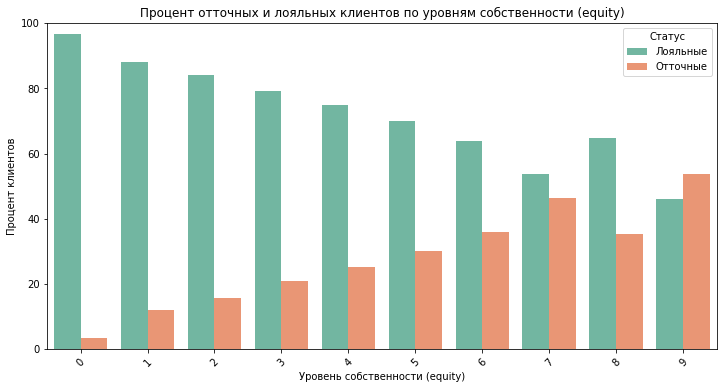

In [61]:
total_clients = bank.groupby('equity').size().reset_index(name='total')

# Подсчет количества отточных и лояльных клиентов
churn_counts = bank.groupby(['equity', 'churn']).size().reset_index(name='count')

# Объединение данных
summary = pd.merge(total_clients, churn_counts, on='equity')

# Расчет процентов
summary['percentage'] = (summary['count'] / summary['total']) * 100

# Переименование статуса
summary['status'] = summary['churn'].replace({1: 'Отточные', 0: 'Лояльные'})

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(x='equity', y='percentage', hue='status', data=summary, palette='Set2')
plt.title('Процент отточных и лояльных клиентов по уровням собственности (equity)')
plt.xlabel('Уровень собственности (equity)')
plt.ylabel('Процент клиентов')
plt.legend(title='Статус')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Установка пределов по оси Y от 0 до 100%
plt.show()




Количество отточных клиентов увеличивается с ростом оценки уровня собственности у клиента.


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️С этим сложно поспорить.</div>

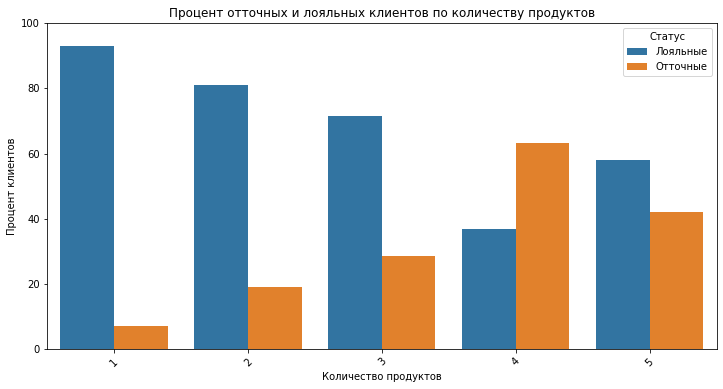

In [62]:
total_clients = bank.groupby('products').size().reset_index(name='total')

# Подсчет количества отточных и лояльных клиентов
churn_counts = bank.groupby(['products', 'churn']).size().reset_index(name='count')

# Объединение данных
summary = pd.merge(total_clients, churn_counts, on='products', how='left')

# Заполнение пропусков нулями (если есть продукты без отточных/лояльных клиентов)
summary['count'] = summary['count'].fillna(0)

# Расчет процентов
summary['percentage'] = (summary['count'] / summary['total']) * 100

# Переименование статуса
summary['status'] = summary['churn'].replace({1: 'Отточные', 0: 'Лояльные'})

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(x='products', y='percentage', hue='status', data=summary)
plt.title('Процент отточных и лояльных клиентов по количеству продуктов')
plt.xlabel('Количество продуктов')
plt.ylabel('Процент клиентов')
plt.legend(title='Статус')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Установка пределов по оси Y от 0 до 100%
plt.show()



Наиболее подвержены оттоку клиенты с 3-мя продуктами и более.

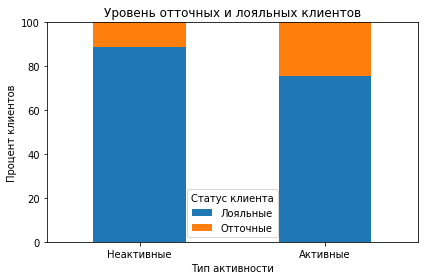

In [63]:
# Подсчет количества клиентов в каждой категории
summary = bank.groupby(['last_activity', 'churn']).size().unstack(fill_value=0)

# Рассчитываем процент отточных и лояльных клиентов
summary_percentage = summary.div(summary.sum(axis=1), axis=0) * 100

# Переименуем индексы для удобства
summary_percentage.index = ['Неактивные', 'Активные']
summary_percentage.columns = ['Лояльные', 'Отточные']

# Построение столбчатой диаграммы
summary_percentage.plot(kind='bar', stacked=True)

# Настройка графика
plt.title('Уровень отточных и лояльных клиентов')
plt.xlabel('Тип активности')
plt.ylabel('Процент клиентов')
plt.xticks(rotation=0)
plt.legend(title='Статус клиента', labels=['Лояльные', 'Отточные'])
plt.ylim(0, 100)

# Показать график
plt.tight_layout()
plt.show()


Уровень оттока выше у активных клиентов.

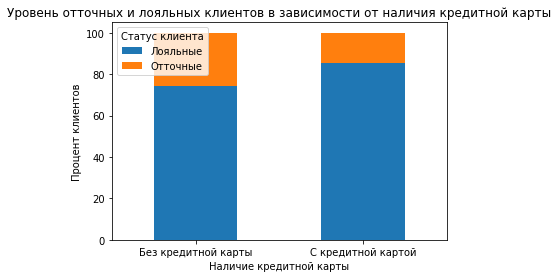

In [64]:
summary = bank.groupby(['credit_card', 'churn']).size().unstack(fill_value=0)

# Рассчитываем процент отточных и лояльных клиентов
summary_percentage = summary.div(summary.sum(axis=1), axis=0) * 100

# Переименуем индексы для удобства
summary_percentage.index = ['Без кредитной карты', 'С кредитной картой']
summary_percentage.columns = ['Лояльные', 'Отточные']

# Построение столбчатой диаграммы
summary_percentage.plot(kind='bar', stacked=True,)

# Настройка графика
plt.title('Уровень отточных и лояльных клиентов в зависимости от наличия кредитной карты')
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Процент клиентов')
plt.xticks(rotation=0)
plt.legend(title='Статус клиента', labels=['Лояльные', 'Отточные']);
#plt.ylim(0, 100);


Процент отточных клиентов без кредитной карты выше,чем с картой.

### Построение распределения непрерывных величин с помощью кодировки.  


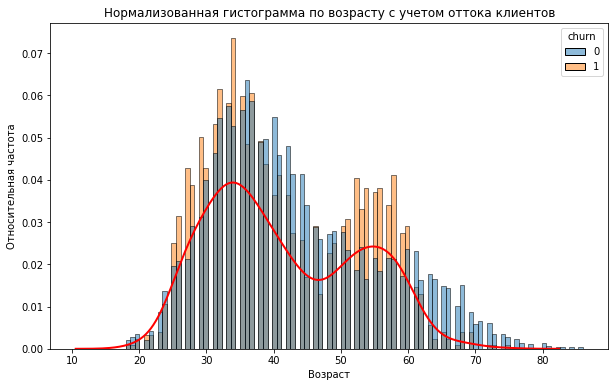

In [65]:
plt.figure(figsize=(10, 6))

# Строим нормализованную гистограмму
sns.histplot(data=bank, x='age', hue='churn', stat='density', common_norm=False, bins=100, alpha=0.5)

# Добавляем линию плотности
sns.kdeplot(data=bank[bank['churn'] == 1], x='age', color='red', label='Отточный', lw=2)

# Добавляем заголовок и метки осей
plt.title('Нормализованная гистограмма по возрасту с учетом оттока клиентов')
plt.xlabel('Возраст')
plt.ylabel('Относительная частота');



Таким образом,можно отметить что стоит обратить внимание на клиентов от 25 до 35 лет, а также от 50 до 60 т.к. доля отточных клиентов исходя из графика на этих участках выше,чем оставшихся.

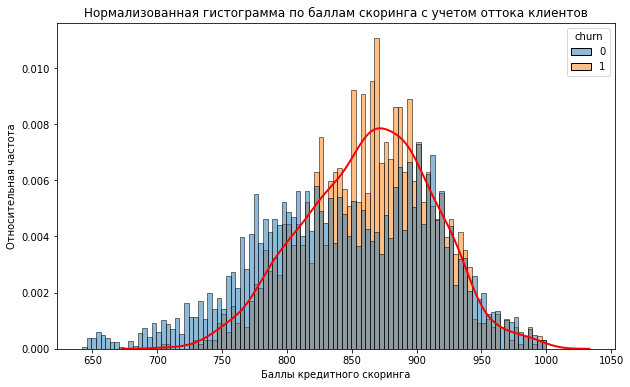

In [66]:
plt.figure(figsize=(10, 6))

# Строим нормализованную гистограмму
sns.histplot(data=bank, x='score', hue='churn', stat='density', common_norm=False, bins=100, alpha=0.5)

# Добавляем линию плотности
sns.kdeplot(data=bank[bank['churn'] == 1], x='score', color='red', label='Отток', lw=2)
   
# Добавляем заголовок и метки осей
plt.title('Нормализованная гистограмма по баллам скоринга с учетом оттока клиентов')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Относительная частота');

Процент оттока выше среди клиентов с баллами кредитного скоринга в диапозоне от 800 до 900.

In [67]:
bank['est_salary'] = bank['est_salary'].clip(upper=500000)

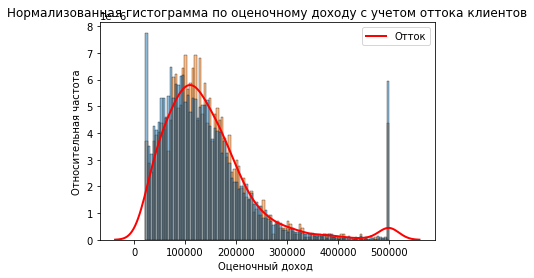

In [68]:
# Строим нормализованную гистограмму
sns.histplot(data=bank, x='est_salary', hue='churn', stat='density', common_norm=False, bins=100, alpha=0.5)

# Добавляем линию плотности для клиентов с оттоком
sns.kdeplot(data=bank[bank['churn'] == 1], x='est_salary', color='red', label='Отток', lw=2)


# Добавляем заголовок и метки осей
plt.title('Нормализованная гистограмма по оценочному доходу с учетом оттока клиентов')
plt.xlabel('Оценочный доход ')
plt.ylabel('Относительная частота')
# Отображаем легенду
plt.legend()

# Показываем график
plt.show;

Более подвержены оттоку клиенты с оценочным доходом более 100000.

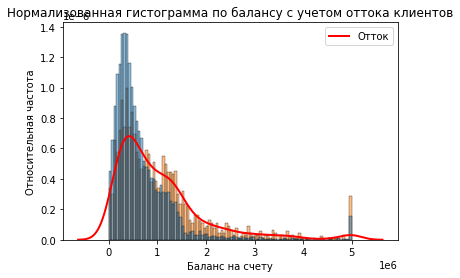

In [69]:
# Строим нормализованную гистограмму
sns.histplot(data=bank, x='balance', hue='churn', stat='density', common_norm=False, bins=100, alpha=0.5)

# Добавляем линию плотности для клиентов с оттоком
sns.kdeplot(data=bank[bank['churn'] == 1], x='balance', color='red', label='Отток', lw=2)


# Добавляем заголовок и метки осей
plt.title('Нормализованная гистограмма по балансу с учетом оттока клиентов')
plt.xlabel('Баланс на счету')
plt.ylabel('Относительная частота')
# Отображаем легенду
plt.legend()

# Показываем график
plt.show()

Отток выше у клиентов с высокими балансами от 1000000.

### Сравнение портрета оставшихся и отточных клиентов  


        По проведенному выше анализу мы имеем 18,19 % отточных клиентов и можем сформировать портрет отточного клиента:  
    -преимущественно это мужчины,  
    -c высоким баллом кредитного скоринга(более 800),  
    -с несколькими банковскими продуктами,  
    -чаще в возрасте 25-30 лет и 50-60 лет,  
    -с прогнозируемым доходом от 100000,  
    -балансом на счете от 1000000 и более.  
    

        Лояльные(среднестатистические клиенты банка):  
    -мужчины и женщины примерно в равных долях,  
    -c баллом собственности 3,  
    -с 2 продуктами,  
    -средним возрастом от 30 до 50,  
    -прогнозируемым доходом до 100000,  
    -с балансом до 1000000.  

### Корреляционный анализ

Проведем корреляционный анализ,чтобы оценить взаимосвязь признаков с оттоком клиентов.

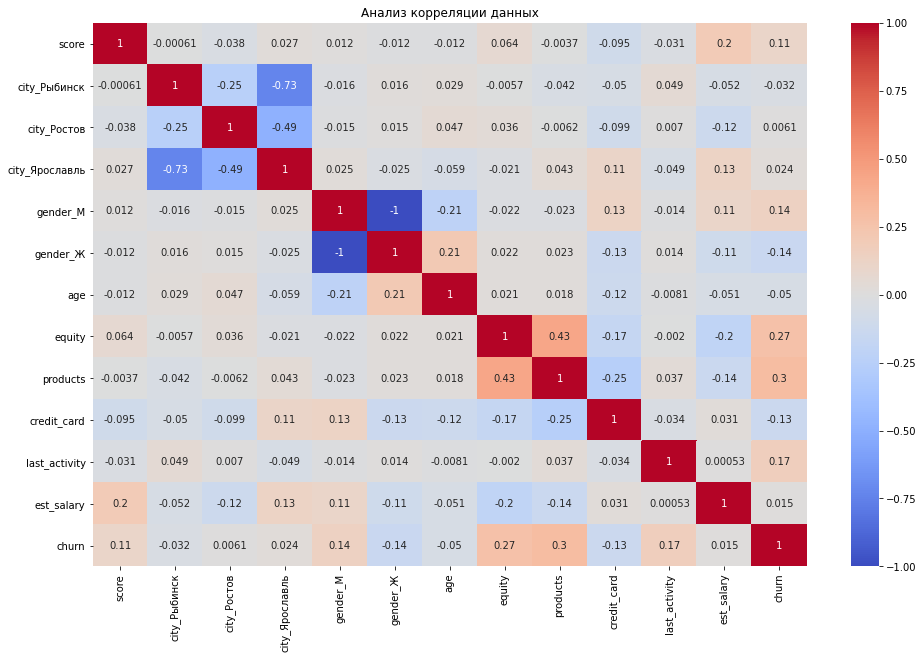

In [70]:
correlation_matrix = bank[['score','city_Рыбинск','city_Ростов','city_Ярославль','gender_М','gender_Ж','age','equity','products','credit_card','last_activity','est_salary','churn']].corr()
plt.figure(figsize=(16, 10)) 

# Построение тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Добавление заголовка
plt.title('Анализ корреляции данных')

plt.show()

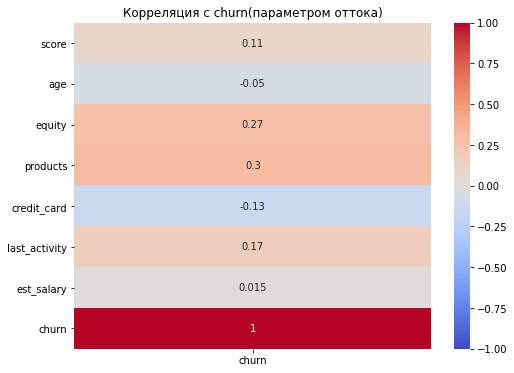

In [71]:
# Вычисляем корреляционную матрицу
correlation_matrix = bank[['score', 'city', 'gender', 'age', 'equity', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']].corr()

# Извлекаем только строку и столбец, соответствующие missing_balance
churn_correlation = correlation_matrix[['churn']]

# Построение тепловой карты для корреляций со столбцом missing_balance
plt.figure(figsize=(8, 6))  # Увеличиваем размер графика для лучшей читаемости
sns.heatmap(churn_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Добавление заголовка
plt.title('Корреляция с churn(параметром оттока)')
plt.show()

         По итогам корреляционного анализа мы видим score  (0.105634) имеет  слабую положительную корреляция с оттоком клиентов. Это может указывать на то, что более высокие оценки незначительно связаны с увеличением вероятности оттока. age (-0.050217): cлабая отрицательная корреляция с оттоком клиентов, возраст не сильно влияет на вероятность оттока. C equity (0.270581):означает умеренную положительную корреляцию с оттоком клиентов. Это говорит о том, что клиенты с более высоким уровнем капитала имеют большую вероятность оттока.   Возможно, это связано с тем, что такие клиенты могут легче перейти к конкурентам. C products (0.301616) умеренная положительная корреляция с оттоком клиентов, клиенты, имеющие больше продуктов в банке, могут быть менее лояльны. C credit_card (-0.130524): cлабая отрицательная корреляция с оттоком клиентов , наличие кредитной карты связано с меньшей вероятностью оттока, но связь также не является сильной. C last_activity (0.169037):слабая положительная корреляция с оттоком клиентов. Это может указывать на то, что клиенты, которые менее активно взаимодействуют с банком, имеют большую вероятность оттока.  
        Таким образом, отточные клиенты, это клиенты с высоким уровнем капитала и большим количеством продуктов: Эти факторы могут быть связаны с увеличением вероятности оттока, поэтому стоит обратить внимание на удержание таких клиентов. 


## Статический анализ данных  


### Формулировка гипотез

Cформулируем первую гипотезу  
H0: Средний доход клиентов, которые ушли, равен среднему доходу клиентов, которые остались.  
H1: Средний доход клиентов, которые ушли, не равен среднему доходу клиентов, которые остались.  


In [72]:
# Разделим клиентов на группы(ушедшие и оставшиеся)
income_churned = bank[bank['churn'] == 1]['est_salary']
income_stayed = bank[bank['churn'] == 0]['est_salary']

Перед проведением t-теста проверим, нормально ли распределены данные в обеих группах с помощью теста Шапиро-Уилка.


In [73]:
# Тест Шапиро-Уилка
shapiro_churned = stats.shapiro(income_churned)
shapiro_stayed = stats.shapiro(income_stayed)

print('Тест Шапиро-Уилка для отточных клиентов:', shapiro_churned)
print('Тест Шапиро_уилка для лояльных клиентов:', shapiro_stayed)


Тест Шапиро-Уилка для отточных клиентов: ShapiroResult(statistic=0.852712094783783, pvalue=3.376456675759933e-38)
Тест Шапиро_уилка для лояльных клиентов: ShapiroResult(statistic=0.8338226079940796, pvalue=0.0)


          По итогам проведеного теста:
    Для группы клиентов, которые ушли (churned), p-value = 0.0 указывает на то, что распределение доходов в этой группе значительно отличается от нормального.
    Для группы клиентов, которые остались (stayed), p-value = 0.0 также указывает на ненормальное распределение.
        Поскольку данные в обеих группах не распределены нормально, использование t-теста для независимых выборок не будет уместным.
       Вместо этого следует использовать непараметрический тест, такой как тест Манна-Уитни (U-тест), который не требует предположения о нормальности распределения.  


In [74]:
u_stat, p_value_mw = stats.mannwhitneyu(income_churned, income_stayed)

print('U-statistic:', u_stat)
print('p-value (Mann-Whitney):', p_value_mw)


U-statistic: 7852274.0
p-value (Mann-Whitney): 0.00021134781590903274


Отвергаем нулевую гипотезу о равенстве среднего дохода ушедших и оставшихся клиентов.

Сформулируем вторую гипотезу:  
H0: Средний возраст клиентов, которые ушли, равен среднему доходу клиентов, которые остались.  
H1: Средний возраст клиентов, которые ушли, не равен среднему доходу клиентов, которые остались.  


In [75]:
# Разделение на группы
age_churned = bank[bank['churn'] == 1]['age']
age_stayed = bank[bank['churn'] == 0]['age']

Перед проведением t-теста проверим, нормально ли распределены данные в обеих группах с помощью теста Шапиро-Уилка.


In [76]:
#Тест Шапиро-Уилка
shapiroAge_churned = stats.shapiro(age_churned)
shapiroAge_stayed = stats.shapiro(age_stayed)

print('Тест Шапиро-Уилка для отточных клиентов:', shapiro_churned)
print('Тест Шапиро_уилка для лояльных клиентов:', shapiro_stayed)


Тест Шапиро-Уилка для отточных клиентов: ShapiroResult(statistic=0.852712094783783, pvalue=3.376456675759933e-38)
Тест Шапиро_уилка для лояльных клиентов: ShapiroResult(statistic=0.8338226079940796, pvalue=0.0)


Таким образом,можем сделать вывод что по обеим группам распределение отличается от нормального, поэтому вместо t-testa следует использовать непараметрический тест, такой как тест Манна-Уитни (U-тест), который не требует предположения о нормальности распределения.  


In [77]:
u_stat, p_value_mw = stats.mannwhitneyu(age_churned, age_stayed)

print('U-statistic:', u_stat)
print('p-value (Mann-Whitney):', p_value_mw)


U-statistic: 6925307.5
p-value (Mann-Whitney): 3.813328889714715e-06


По итогам теста отвергаем нулевую гипотезу о равенстве возраста ушедших и оставшихся пользователей.

## Сегментация клиентов на основании проведенного анализа  


### Выделение сегментов отточных клиентов по комбинации признаков  


Далее постараемся скомбинировать признаками,таким образом, чтобы получить наиболее вероятные сегменты оттока.

In [78]:
len(bank.query('gender == "М" & balance > 500000 & city == "Ярославль" and churn == 1')) / len(bank.query('gender == "М" & balance > 500000 & city == "Ярославль"'))


0.4074702886247878

Посчитаем размер сегмента

In [79]:
len(bank.query('gender == "М" & balance > 500000 & city == "Ярославль"'))


1178

In [80]:
len(bank.query('gender == "М" & score>800 & age>=50 & age<=60 and churn == 1')) / len(bank.query('gender == "М" & score > 800 & age>=50 & age<=60'))


0.3745819397993311

In [81]:
len(bank.query('gender == "М" & score > 800 & age>=50 & age<=60'))


598

In [82]:
len(bank.query('gender == "М" & equity>=5 &  churn == 1')) / len(bank.query('gender == "М" & equity>=5 '))


0.41317898486197685

In [83]:
len(bank.query('gender == "М" & equity>=5 '))

1123

In [84]:
len(bank.query('gender == "Ж" & products>3 &  churn == 1')) / len(bank.query('gender == "Ж" & products>3 '))


0.5478723404255319

In [85]:
len(bank.query('gender == "Ж" & products>3 '))


188

Получаем большой процент оттока, однако маленький размер сегмента,не принимаем его в рассмотрение.

In [86]:
len(bank.query('gender == "Ж" & balance>1000000 &  churn == 1')) / len(bank.query('gender == "Ж" & balance>1000000 '))


0.2722222222222222

Также неподходящий сегмент,т.к. процент оттока менее чем в 2 раза раза превышает средний по банку.

In [87]:
len(bank.query('gender == "М" & credit_card==0 & est_salary>100000 & churn == 1')) / len(bank.query('gender == "М" & credit_card==0 & est_salary>100000  '))


0.3742690058479532

In [88]:
len(bank.query('gender == "М" & credit_card==0 & est_salary>100000'))


855

### Расчет метрик (общее количество клиентов, количество отточных клиентов, процент отточных клиентов в каждом сегменте)  


Рассмотрим первый сегмент, который у нас представлен мужчинами из города Ярославля с балансом более 500 000.


In [89]:
# Рассчитаем общую численность клиентов в сегменте
segment1_total=len(bank.query('gender == "М" & balance > 500000 & city == "Ярославль"'))
print(f"Численность клиентов по сегменту №1: {segment1_total}")
    

Численность клиентов по сегменту №1: 1178


In [90]:
#Произведем расчет количества отточных клиентов по сегменту 1:
segment1_churn=len(bank.query('gender == "М" & balance > 500000 & city == "Ярославль" and churn == 1'))
print(f"Количество отточных клиентов по сегменту №1: {segment1_churn}")


Количество отточных клиентов по сегменту №1: 480


In [91]:
#Рассчитаем процент оттока по данному сегменту:
percent1_churn=(len(bank.query('gender == "М" & balance > 500000 & city == "Ярославль" and churn == 1')) / len(bank.query('gender == "М" & balance > 500000 & city == "Ярославль"')))*100
print(f"Процент оттока по сегменту №1: {percent1_churn:.2f}%")

Процент оттока по сегменту №1: 40.75%


Сегмент получился довольно многочисленным и с высоким процентом оттока, что подходит для нашего исследования.

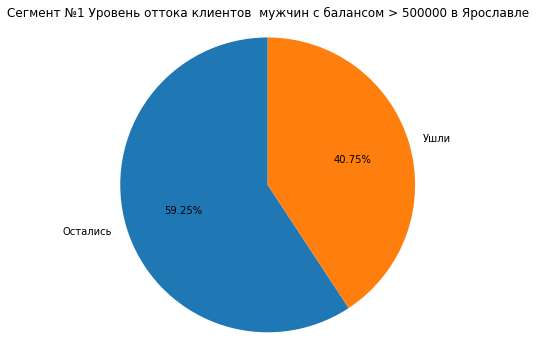

In [92]:
segment1 = bank.query('gender == "М" & balance > 500000 & city == "Ярославль"')

# Подсчитываем количество ушедших и оставшихся клиентов
churn_counts = segment1['churn'].value_counts()

# Создаем круговую диаграмму
plt.figure(figsize=(8, 6))
plt.colors = ["g", "r"]

plt.pie(churn_counts, labels=['Остались', 'Ушли'], autopct='%1.2f%%', startangle=90)
plt.title('Сегмент №1 Уровень оттока клиентов  мужчин с балансом > 500000 в Ярославле')
plt.axis('equal')

plt.show()

Рассмотрим следующий сегмент №2( мужчины с баллами кредитного скоринга выше 800 и возрастом от 50 до 60)

In [93]:
 # Определим размер сегмента
segment2_total=len(bank.query('gender == "М" & score > 800 & age>=50 & age<=60'))
print(f"Численность клиентов по сегменту №2: {segment2_total}")



Численность клиентов по сегменту №2: 598


In [94]:
#Произведем расчет количества отточных клиентов по сегменту 2
segment2_churn=len(bank.query('gender == "М" & score>800 & age>=50 & age<=60 and churn == 1')) 
print(f"Количество отточных клиентов по сегменту №2: {segment2_churn}")


Количество отточных клиентов по сегменту №2: 224


In [95]:
# Рассчитаем процент оттока по сегменту №2
percent2_churn=(len(bank.query('gender == "М" & score>800 & age>=50 & age<=60 and churn == 1')) / len(bank.query('gender == "М" & score > 800 & age>=50 & age<=60'))*100)
print(f"Процент оттока по сегменту №1: {percent2_churn:.2f}%")

Процент оттока по сегменту №1: 37.46%


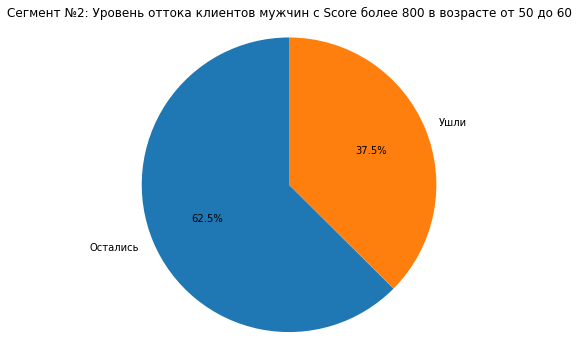

In [96]:
# Фильтруем данные по сегменту 2
segment2 = bank.query('gender == "М" & score > 800 & age >= 50 & age <= 60')

# Подсчитываем количество ушедших (churn == 1) и оставшихся (churn == 0) клиентов
churn_counts = segment2['churn'].value_counts()
colors = ['green', 'yellow']
# Создаем круговую диаграмму
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=['Остались', 'Ушли'], autopct='%1.1f%%', startangle=90)
plt.title('Сегмент №2: Уровень оттока клиентов мужчин с Score более 800 в возрасте от 50 до 60')
plt.axis('equal')  
plt.show()


Сегмент № 2 получился довольно таки небольшим, но с подходящим процентом оттока.

Рассмотрим сегмент №3 (представленный мужчинами с количеством баллов собственности более 5)

In [97]:
# Рассчитаем общую численность клиентов в сегменте
segment3_total=len(bank.query('gender == "М" & equity>=5 '))
print(f"Численность клиентов по сегменту №3: {segment3_total}")


Численность клиентов по сегменту №3: 1123


In [98]:
#Произведем расчет количества отточных клиентов по сегменту 3:
segment3_churn=len(bank.query('gender == "М" & equity>=5 &  churn == 1'))
print(f"Количество отточных клиентов по сегменту №3: {segment3_churn}")


Количество отточных клиентов по сегменту №3: 464


In [99]:
# Рассчитаем процент оттока по сегменту №3
percent3_churn=(len(bank.query('gender == "М" & equity>=5 &  churn == 1')) / len(bank.query('gender == "М" & equity>=5 ')))*100
print(f"Процент оттока по сегменту №3: {percent3_churn:.2f}%")

Процент оттока по сегменту №3: 41.32%


Сегмент №3 получился достаточной численности и с высоким уровнем оттока.

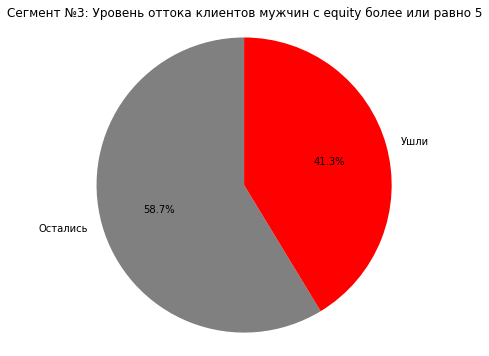

In [100]:
segment3 = bank.query('gender == "М" & equity >= 5')

# Подсчитываем количество ушедших (churn == 1) и оставшихся (churn == 0) клиентов
churn_counts_segment3 = segment3['churn'].value_counts()

# Определяем цвета для диаграммы
colors = ['grey', 'red']  

# Создаем круговую диаграмму с заданными цветами
plt.figure(figsize=(8, 6))
plt.pie(churn_counts_segment3, labels=['Остались', 'Ушли'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Сегмент №3: Уровень оттока клиентов мужчин с equity более или равно 5')
plt.axis('equal')  
plt.show()

Рассмотрим сегмент № 4(состоящий из мужчин без кредитной карты с ожидаемым доходом более 100000).

In [101]:
# Рассчитаем общую численность клиентов в сегменте
segment4_total=len(bank.query('gender == "М" & credit_card==0 & est_salary>100000  '))
print(f"Численность клиентов по сегменту №4: {segment4_total}")


Численность клиентов по сегменту №4: 855


In [102]:
#Произведем расчет количества отточных клиентов по сегменту 4:
segment4_churn=len(bank.query('gender == "М" & credit_card==0 & est_salary>100000 & churn == 1')) 
print(f"Количество отточных клиентов по сегменту №4: {segment4_churn}")


Количество отточных клиентов по сегменту №4: 320


In [103]:
# Рассчитаем процент оттока по сегменту №4
percent4_churn=(len(bank.query('gender == "М" & credit_card==0 & est_salary>100000 & churn == 1')) / len(bank.query('gender == "М" & credit_card==0 & est_salary>100000  ')))*100
print(f"Процент оттока по сегменту №4: {percent4_churn:.2f}%")

Процент оттока по сегменту №4: 37.43%


Четвертый сегмент достаточно небольшой и со средним процентом оттока.

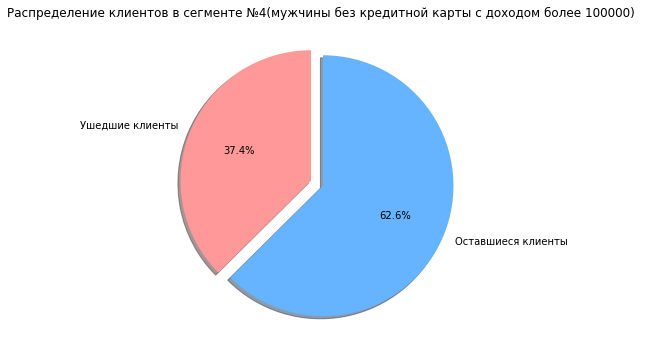

In [104]:
segment4_total = len(bank.query('gender == "М" & credit_card==0 & est_salary>100000'))
segment4_churn = len(bank.query('gender == "М" & credit_card==0 & est_salary>100000 & churn == 1'))

# Количество оставшихся клиентов
segment4_remaining = segment4_total - segment4_churn

# Данные для диаграммы
labels = ['Ушедшие клиенты', 'Оставшиеся клиенты']
sizes = [segment4_churn, segment4_remaining]
colors = ['#ff9999','#66b3ff']  # Цвета для сегментов
explode = (0.1, 0)  # Выделяем первый сегмент

# Создание круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis
plt.title('Распределение клиентов в сегменте №4(мужчины без кредитной карты с доходом более 100000) ')
plt.show()


### Предложения и рекомендации по снижению уровня оттока по сегментам

    Таким образом, у нас получилось 4 сегмента с относительно высокими процентами оттока от от 37.43% до 41.32% ,почти половина клиентов в данных сегментах покидает компанию, что может указывать на проблемы с удовлетворенностью клиентов или конкуренцией.
     Для первого сегмента клиентов с довольно высоким балансом хотелось бы предложить выгодные условия депозитов и возможно дифференцированную программу лояльности в зависимости от суммы баланса, для лучшего удержания платежеспособных клиентов.
     Для второго сегмента, в котором преобладают мужчины с высоким баллом скоринга(более 800,что говорит об их надежности и исполнительности) и возрастом от 50 до 60, можно разработать персонализированные предложения:
  - специальные финансовые продукты или услуги, которые соответствуют потребностям предпенсионной возрастной группы, например, пенсионные  накопления, инвестиционные продукты с низким риском или специальные кредитные предложения.
 А также программы лояльности, предлагающие бонусы или скидки на услуги для клиентов с высоким скорингом. Это может включать снижение процентной ставки по кредитам или повышенные проценты по депозитам.
      Для третьего сегмента(мужчин с количеством баллов собственности более 5) возможно стоит предложить индивидуальные инвестиционные решения, программы по управлению активами и кредиты на выгодных условиях для бизнеса.
      Для четвертого сегмента (мужчин без кредитной карты банка и уровнем ожидаемого дохода более 100000) возможно стоит предложить банковскую карту на выгодных условиях с дополнительными бонусами и кэш беком.
   Также исходя из исследования известно, что среди клиентов-женщин есть 12,74% оттока. Возможно таким клиентам банку следует предлагать кэшбек на категорию косметика и парфюмерия.
        В качестве общих рекомендаций предлагаю:
    1. Улучшить клиентский сервис.Это может включать обучение персонала, улучшение процессов обработки запросов и обращений.
    2. Персонализированные предложения: Разработать специальные предложения или акции для удержания клиентов. Например, программы лояльности, скидки на услуги или персонализированные финансовые консультации.
    4. Мониторинг конкурентов: Изучить предложения конкурентов для понимания, чем они могут привлекать ваших клиентов. Возможно, стоит адаптировать свои услуги или цены в соответствии с рыночными условиями.
    5. Обратная связь и вовлеченность: Создать каналы для регулярной обратной связи с клиентами и вовлечения их в процесс принятия решений (например, через опросы о новых продуктах или услугах).


##  Презентация

https://disk.yandex.ru/i/JaXCGI35uwKS2A